In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, classification_report

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics 

# Cleaning data

In [3]:
df = pd.read_csv(r"C:\Users\fatim\Downloads\archive (1)\IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.drop_duplicates()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df['species'] = df['species'].map( {'Iris-setosa': 0,'Iris-virginica':1,'Iris-versicolor':2}).astype(int)

In [8]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


# Data Visualization

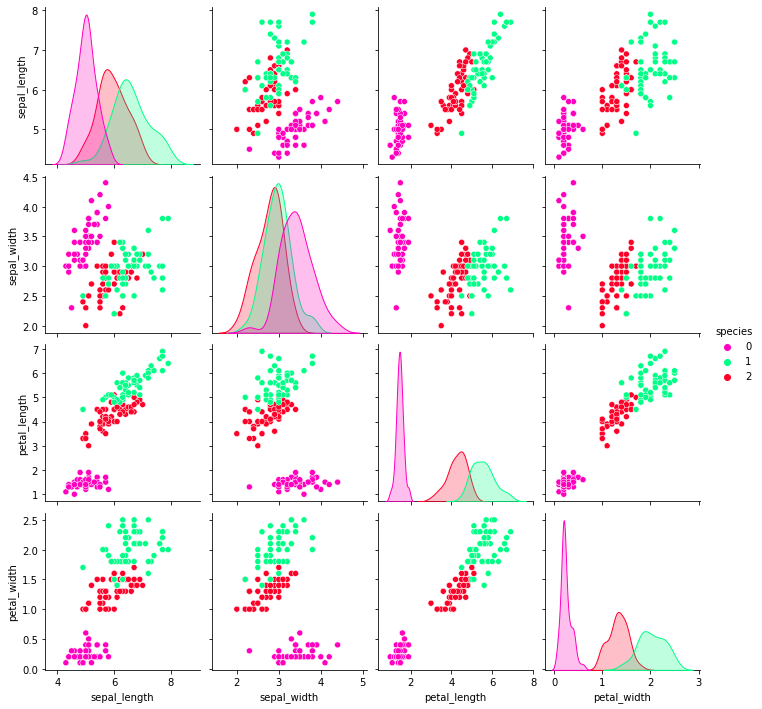

In [9]:
##Trellis plot used to plot multiple sub-plots to identify patterns

green_palette = sns.color_palette("viridis", n_colors=3)
sns.pairplot(df,hue='species',palette='gist_rainbow_r')
plt.show()

# Splitting the data

In [10]:
y = df['species']
X = df.drop('species', axis=1)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50, stratify = y )
print("Shape of Training dataset: ", X_train.shape)
print("Shape of Testing dataset: ", X_test.shape)

Shape of Training dataset:  (105, 4)
Shape of Testing dataset:  (45, 4)


# Model Building

In [12]:
from sklearn.ensemble import RandomForestClassifier
dt_model = RandomForestClassifier(n_estimators = 20)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)  

In [13]:
dt_accuracy = accuracy_score(y_test,y_pred)
dt_f1 = f1_score(y_test,y_pred, average='macro')
print("F1 SCORE: ", dt_f1)
print("Accuracy: " , dt_accuracy)

F1 SCORE:  0.9332591768631814
Accuracy:  0.9333333333333333


In [14]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


# Checking model 

In [15]:
y_predict = dt_model.predict([[5.1,3.5,1.4,0.2]])
print(y_predict)
if y_predict==0:
    print("Iris-setosa")
elif y_predict == 1:
    print("Iris-virginica")
else:
    print("Iris-versicolor")

[0]
Iris-setosa


C:\Users\fatim\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [16]:
y_predict = dt_model.predict([[6.3,2.5,5.0,1.9]])
print(y_predict)
if y_predict==0:
    print("Iris-setosa")
elif y_predict == 1:
    print("Iris-virginica")
else:
    print("Iris-versicolor")

[1]
Iris-virginica


C:\Users\fatim\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
